In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_project/dataset.csv')

In [ ]:
df.head(2)

,prompttext_clean,text_clean,text_cnt_stopwords,text_cntpunct,text_wordcnt,text_length,text_syllablecnt,text_ARI,text_GFI,text_cntverb,...,text_cntnoun,text_cntpronoun,text_cntspecificpos,text_bigram,text_trigram,text_misspellcnt,text_unique,cos_similarity_text_prompt,content,wording
0,chapter sequel already say must proceed consid...,element ideal tragedy arrange complex plan ano...,31,3,55,285,94,25.85,24.18,3,...,11,3,5,54,53,0,33,0.167416,-0.210614,-0.471415
1,chapter sequel already say must proceed consid...,three element ideal tragedy character not bad ...,12,6,26,143,44,12.95,15.02,3,...,6,2,2,25,24,1,25,0.172985,-0.970237,-0.417058


In [ ]:
df.isnull().sum()

prompttext_clean              0
text_clean                    0
text_cnt_stopwords            0
text_cntpunct                 0
text_wordcnt                  0
text_length                   0
text_syllablecnt              0
text_ARI                      0
text_GFI                      0
text_cntverb                  0
text_cntadjctv                0
text_cntadvrb                 0
text_cntnoun                  0
text_cntpronoun               0
text_cntspecificpos           0
text_bigram                   0
text_trigram                  0
text_misspellcnt              0
text_unique                   0
cos_similarity_text_prompt    0
content                       0
wording                       0
dtype: int64

In [ ]:
df['text_clean'][0]

'element ideal tragedy arrange complex plan another element ideal tragedy one main issue last element ideal tragedy double thread plot opposite catastrophe good bad'

In [ ]:
df['prompttext_clean'][0]

'chapter sequel already say must proceed consider poet aim avoid construct plot mean specific effect tragedy produce perfect tragedy see arrange not simple complex plan moreover imitate action excite pity fear distinctive mark tragic imitation follow plainly first place change fortune present must not spectacle virtuous man bring prosperity adversity move neither pity fear merely shock we bad man pass adversity prosperity nothing alien spirit tragedy possess single tragic quality neither satisfy moral sense call forth pity fear downfall utter villain exhibit plot kind would doubtless satisfy moral sense would inspire neither pity fear pity arouse unmerited misfortune fear misfortune man like event therefore neither pitiful terrible remain character two extreme man not eminently good yet whose misfortune bring not vice depravity error judgement frailty must one highly renowned prosperous personage like oedipus thyeste illustrious man family wellconstructe plot therefore single issue rat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, concatenate,BatchNormalization


In [ ]:
df.columns

Index(['prompttext_clean', 'text_clean', 'text_cnt_stopwords', 'text_cntpunct',
       'text_wordcnt', 'text_length', 'text_syllablecnt', 'text_ARI',
       'text_GFI', 'text_cntverb', 'text_cntadjctv', 'text_cntadvrb',
       'text_cntnoun', 'text_cntpronoun', 'text_cntspecificpos', 'text_bigram',
       'text_trigram', 'text_misspellcnt', 'text_unique',
       'cos_similarity_text_prompt', 'content', 'wording'],
      dtype='object')

In [ ]:
max_words = 10000
# max_sequence_length = 20

text_features = df[['prompttext_clean','text_clean']].values


text_features = text_features.tolist()  # Convert to list (if needed)
text_features = ["".join(map(str, doc)) for doc in text_features]  # Join words into strings

text_features

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text_features)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(text_features)
max_text_length = max(len(seq) for seq in train_sequences)
# max_text_length = 675
train_sequences = pad_sequences(train_sequences, maxlen=max_text_length,padding='post')
# x_train_padded = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
print(len(train_sequences))

6965


In [ ]:
max_text_length

656

In [ ]:
train_numerical_features = df.drop(['text_clean','prompttext_clean','content','wording'],axis=1)
train_df = np.hstack((train_sequences,train_numerical_features))



print("\nHorizontally stacked array:")
print(train_df.shape)


Horizontally stacked array:
(6965, 674)


In [ ]:
max_len = 674

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(train_df)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
y = df[['content','wording']].values
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
#LSTM??

In [ ]:
from sklearn.model_selection import train_test_split

# Fix the typo in train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Ensure that x_train and y_train have the correct shapes and values
print(x_train.shape, y_train.shape)

(5572, 674) (5572, 2)


In [ ]:
# vocab_size = 10000
# embedding_vector_features = 50
# max_len = 674  # Assuming you have a maximum sequence length

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_vector_features, input_length=max_len))
# model.add(BatchNormalization())
# model.add(LSTM(100, activation='tanh'))
# model.add(BatchNormalization())
# model.add(Dense(2,activation='linear'))
# model.compile(loss='mean_squared_error ', optimizer='adam', metrics=['mae'])
# model.summary()
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


vocab_size = 10000
embedding_vector_features = 50
max_len = 674

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=max_len))
model.add(Dropout(0.3))  # Add dropout before LSTM
model.add(LSTM(200, activation='tanh'))  # Experiment with sigmoid or linear activation
model.add(BatchNormalization())  # Move BN after LSTM
model.add(Dense(2, activation='linear'))

optimizer = Adam(clipvalue=1.0,learning_rate=0.0001)  # Apply gradient clipping
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

# Implement early stopping (example using Keras callbacks)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 674, 50)           500000    
                                                                 
 dropout (Dropout)           (None, 674, 50)           0         
                                                                 
 lstm (LSTM)                 (None, 200)               200800    
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 702002 (2.68 MB)
Trainable params: 701602 (2.68 MB)
Non-trainable params: 400 (1.56 KB)
____________________

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
88/88 [==============================] - 221s 2s/step - loss: 0.9106 - mae: 0.7752 - val_loss: 0.9115 - val_mae: 0.7754
Epoch 2/20
88/88 [==============================] - 217s 2s/step - loss: 0.9003 - mae: 0.7691 - val_loss: 0.9133 - val_mae: 0.7760
Epoch 3/20
88/88 [==============================] - 221s 3s/step - loss: 0.8971 - mae: 0.7681 - val_loss: 0.9139 - val_mae: 0.7768
Epoch 4/20
88/88 [==============================] - 218s 2s/step - loss: 0.8948 - mae: 0.7663 - val_loss: 0.9141 - val_mae: 0.7762
Epoch 5/20
88/88 [==============================] - 215s 2s/step - loss: 0.8968 - mae: 0.7675 - val_loss: 0.9179 - val_mae: 0.7787
Epoch 6/20
88/88 [==============================] - 213s 2s/step - loss: 0.8973 - mae: 0.7679 - val_loss: 0.9156 - val_mae: 0.7776
Epoch 7/20
88/88 [==============================] - 219s 2s/step - loss: 0.8936 - mae: 0.7658 - val_loss: 0.9180 - val_mae: 0.7788
Epoch 8/20
88/88 [==============================] - 219s 2s/step - loss: 0.8948 - m

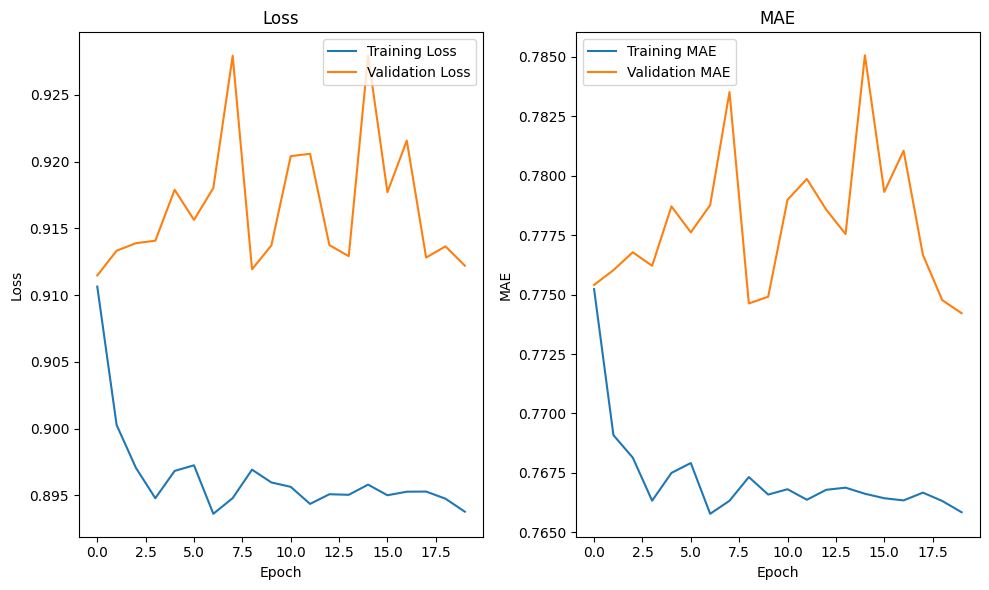

In [ ]:
import matplotlib.pyplot as plt
history = model.history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.figure(figsize=(10, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
 from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate

# Assuming you have already tokenized the textual features and have numerical features
# Also assuming you have defined vocab_size, embedding_dim, max_sequence_length, num_numerical_features
vocab_size = 10000
embedding_dim = 50
num_numerical_features = 18
max_text_length = max_len
# Input for textual features
text_input = Input(shape=(max_text_length,), name='text_input')
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_text_length)(text_input)
lstm_layer = LSTM(units=64)(embedding_layer)

# Input for numerical features
numerical_input = Input(shape=(num_numerical_features,), name='numerical_input')

# Concatenate the output of LSTM with numerical features
concatenated = concatenate([lstm_layer, numerical_input])

# Add dense layers for further processing
dense_layer = Dense(units=64, activation='relu')(concatenated)

# Output layer for regression with two targets
output_layer = Dense(units=2, activation='linear')(dense_layer)  # Assuming 2 target variables

# Define the model
model = Model(inputs=[text_input, numerical_input], outputs=output_layer)

# Compile the model with appropriate loss and metrics for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 655)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 655, 50)              500000    ['text_input[0][0]']          
                                                                                                  
 lstm (LSTM)                 (None, 64)                   29440     ['embedding[0][0]']           
                                                                                                  
 numerical_input (InputLaye  [(None, 18)]                 0         []                            
 r)                                                                                           

In [ ]:
y = df[['content','wording']].values

In [ ]:
train_numerical_features

array([[-0.15069637, -0.69092825, -0.33981888, ..., -0.96534994,
        -0.59180604, -0.83157947],
       [-0.99693268, -0.3294443 , -0.97454782, ..., -0.59195835,
        -0.93965917, -0.78533224],
       [-0.55154515,  2.08044865, -0.38359329, ..., -0.21856676,
        -0.113508  , -0.15086042],
       ...,
       [ 0.38376866,  1.59847006,  0.60133091, ..., -0.96534994,
         0.75612482,  2.30458457],
       [-0.01708012,  0.15253429, -0.09905963, ..., -0.96534994,
        -0.113508  , -0.72670399],
       [ 0.69553993,  0.03203964,  0.75454134, ..., -0.96534994,
         0.79960646,  2.16840802]])

In [ ]:
# Assuming you have text_data, numerical_data, and labels for training

# Train the model
model.fit([train_sequences, train_numerical_features], y, epochs=5, batch_size=16, validation_split=0.2)


In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/My_project/lstm_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
X = df.drop(['content','wording'],axis=1)

In [ ]:
X.columns

Index(['text_clean', 'prompttext_clean', 'text_cnt_stopwords', 'text_cntpunct',
       'text_wordcnt', 'text_length', 'text_syllablecnt', 'text_ARI',
       'text_GFI', 'text_cntverb', 'text_cntadjctv', 'text_cntadvrb',
       'text_cntnoun', 'text_cntpronoun', 'text_cntspecificpos', 'text_bigram',
       'text_trigram', 'text_misspellcnt', 'text_unique',
       'cos_similarity_text_prompt'],
      dtype='object')

In [ ]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("/content/drive/MyDrive/Colab Notebooks/My_project/columns.json","w") as f:
    f.write(json.dumps(columns))


In [ ]:
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from nltk.util import ngrams
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!python3 -m spacy download en_core_web_md
nltk.download('punkt')
!pip3 install textstat
from textstat import gunning_fog
!pip install pyspellchecker
from spellchecker import SpellChecker

In [ ]:
# want to remove all the stopwords other than not , since if we remove 'not' it may affect the meaning of the sentence

stop_words = set(stopwords.words('english'))
stop_words.remove('not')


In [ ]:
nlp = spacy.load("en_core_web_md")

def count_stopwords(text: str) -> int:
    stopwords_list = set(stopwords.words('english'))
    words = text.split()
    stopwords_count = sum(1 for word in words if word.lower() in stopwords_list)
    return stopwords_count

def count_punctuation(text: str) -> int:
    punctuation_set = set(string.punctuation)
    punctuation_count = sum(1 for char in text if char in punctuation_set)
    return punctuation_count

# def count_numbers(text: str) -> int:
#     numbers = re.findall(r'\d+', text)
#     numbers_count = len(numbers)
#     return numbers_count

def collapse_dots(input):
    # Collapse sequential dots
    input = re.sub("\.+", ".", input)
    # Collapse dots separated by whitespaces
    all_collapsed = False
    while not all_collapsed:
        output = re.sub(r"\.(( )*)\.", ".", input)
        all_collapsed = input == output
        input = output
    return output

def clean_text(text:str, join_back=True):
  result = []
  sentences = sent_tokenize(text)
  sentences = [collapse_dots(sentence) for sentence in sentences]
  sentences = [sentence.strip() for sentence in sentences]

  for sentence in sentences:
    words = word_tokenize(sentence)

    words = [re.sub(r'\s+', ' ', word) for word in words]
    words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]
    words = [re.sub(r'[^\w\s]', '', word) for word in words]
    words = [word.lower() for word in words]
    # words = [word for word in words if word not in stop_words]
    filtered_sentence = " ".join(words)
    result.append(filtered_sentence)

  return " ".join(result)

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

def remove_extra_space(text:str):
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

def count_total_words(text: str) -> int:
    words = text.split()
    total_words = len(words)
    return total_words

def count_syllables(word):
    # Simple syllable counting (an approximation)
    vowels = "aeiouAEIOU"
    syllables = sum(1 for char in word if char in vowels)
    return syllables

def automated_readability_indexs(text):

    doc = nlp(text)
    # Calculate the number of words
    word_count = len(doc)

    # Calculate the number of sentences
    sentence_count = len(list(doc.sents))

    # Calculate the average number of letters per word
    letters_per_word = sum(len(word.text) for word in doc) / word_count

    # Calculate the average number of words per sentence
    words_per_sentence = word_count / sentence_count if sentence_count > 0 else 0

    # Calculate the ARI
    ari = 4.71 * letters_per_word + 0.5 * words_per_sentence - 21.43

    return ari

def gunning_fog_index(text):
  text = text
  return gunning_fog(text)


# Function to count verbs
def count_verbs(text):
    doc = nlp(text)
    verbs = [token for token in doc if token.pos_ == "VERB"]
    return len(verbs)

# Function to count adjectives
def count_adjectives(text):
    doc = nlp(text)
    adjectives = [token for token in doc if token.pos_ == "ADJ"]
    return len(adjectives)

# Function to count adverbs
def count_adverbs(text):
    doc = nlp(text)
    adverbs = [token for token in doc if token.pos_ == "ADV"]
    return len(adverbs)

# Function to count nouns
def count_nouns(text):
    doc = nlp(text)
    nouns = [token for token in doc if token.pos_ == "NOUN"]
    return len(nouns)

# Function to count pronouns
def count_pronouns(text):
    doc = nlp(text)
    pronouns = [token for token in doc if token.pos_ == "PRON"]
    return len(pronouns)

def count_specific_pos(text, pos_tag):
    # Count the number of words with a specific part-of-speech tag (e.g., "ADP" for prepositions)
    doc = nlp(text)
    pos_count = sum(1 for token in doc if token.pos_ == pos_tag)
    return pos_count

def count_bigrams(text: str) -> int:
    words = word_tokenize(text)
    bigrams = list(ngrams(words, 2))
    return len(bigrams)

def count_trigrams(text: str) -> int:
    words = word_tokenize(text)
    trigrams = list(ngrams(words, 3))
    return len(trigrams)

spell = SpellChecker()

def misspelled_cnt(text):
  spell = SpellChecker()
  misspelled = spell.unknown(text.split())
  count = len(misspelled)
  return count


def unique_count(text):
  doc = nlp(text)
  words = [token.text for token in doc]
  unique = len(set(words))
  return unique

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    text_tokens = [word for word in text_tokens if word not in stop_words]
    return ' '.join(text_tokens)




def cosine_similarity_text_prompt(text, prompt_text):
    # Tokenize and remove stopwords



    # Create TF-IDF vectors for text and prompt_text
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text, prompt_text])

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return cosine_sim[0][0]



In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()

# def tokenization(prompt, summary):
#   features = [prompt,summary]
#   features = ["".join(map(str, doc)) for doc in features]
#   features = vectorizer.fit_transform(features) # Join words into strings
#   print(features)
#   return features

In [ ]:
def tokenization(prompt,summary):
  features = [prompt,summary]
  features = ["".join(map(str, doc)) for doc in features]  # Join words into strings
  tokenizer.fit_on_texts(features)

  features = tokenizer.texts_to_sequences(features)
  max_text_length = max(len(seq) for seq in features)

  # features = pad_sequences(features, maxlen=655,padding='post')

  return features

In [ ]:
 def prediction(prompt,summary):
  x = [0,0]
  y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

  tokenized = tokenization(summary,prompt)

  x[0] = tokenized[0]
  x[1] = tokenized[1]
  y[0] = text_cntstpwrd
  y[1] = text_cnt_punct
  y[2] = text_wordcnt
  y[3] = text_len
  y[4] = text_syllablecnt
  y[5] = text_ARI
  y[6] = text_GFI
  y[7] = text_cntverb
  y[8] = text_adjtv
  y[9] = text_cntadvrb
  y[10] = text_cntnoun
  y[11] = text_cntpronoun
  y[12] = text_cntspecificpos
  y[13] = text_bigram
  y[14] = text_trigram
  y[15] = text_misspelt
  y[16] = text_unique
  y[17] = cosine_similarity

  x_array = np.array(x).reshape(1, -1)
  x_padded = pad_sequences(x_array, maxlen=655,padding='post')

  y_array = np.array(y).reshape(1, -1)

  # Make predictions using the LSTM model
  lstm_predictions = model.predict([x_padded, y_array])

  return lstm_predictions

In [ ]:
!pip install -q sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = ['The sun sets in the west, painting the sky with hues of orange and pink',
'Learning new languages broadens our understanding of different cultures and perspectives.',
'Coffee is a morning ritual for many, providing a kick of energy to start the day.',
'The sound of waves crashing on the shore has a calming effect on the mind.',
'Technology continues to advance, shaping the way we communicate and access information.',
'Exploring nature allows us to appreciate the beauty of the world around us.',
'Challenges are opportunities for growth and learning.',
'Laughter is a universal language that brings people together.',
'The aroma of freshly baked bread fills the kitchen, creating a sense of warmth.',
'Music has the power to evoke emotions and create lasting memories.']

In [ ]:
sentences =['''Chapter 13 As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should
avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. A perfect tragedy should, as we have seen, be
arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive
mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man
brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from
adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies
the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind would,
doubtless, satisfy the moral sense, but it would inspire neither pity nor fear; for pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves. Such an event, therefore, will be neither pitiful nor terrible. There remains, then, the character between these two extremes — that of a man who is not eminently good and just, yet whose misfortune is brought about not by vice or depravity, but by some error of judgement or frailty. He must be one who is highly renowned and prosperous — a personage like Oedipus, Thyestes, or other illustrious men of such families. A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain. The change of fortune should be not from bad to good, but, reversely, from good to bad. It should come about as the result not of vice, but of some great error or frailty, in a character either such as we have described, or better rather than worse. The practice of the stage bears out our view. At first the poets recounted any legend that came in their way. Now, the best tragedies are founded on the story of a few houses — on the fortunes of Alcmaeon, Oedipus, Orestes, Meleager, Thyestes, Telephus, and those others who have done or suffered something terrible. A tragedy, then, to be perfect according to the rules of art, should be of this construction. Hence they are in error who censure Euripides just because he follows this principle in his plays, many of which end unhappily. It is, as we have said, the right ending. The best proof is that on the stage and in dramatic competition, such plays, if well worked out, are the most tragic in effect; and Euripides, faulty though he may be in the general management of his subject, yet is felt to be the most tragic of the poets. In the second rank comes the kind of tragedy which some place first. Like the Odyssey, it has a double thread of plot, and also an opposite catastrophe for the good and for the bad. It is accounted the best because of the weakness of the spectators; for the poet is guided in what he writes by the wishes of his audience. The pleasure, however, thence derived is not the true tragic pleasure. It is proper rather to Comedy, where those who, in the piece, are the deadliest enemies — like Orestes and Aegisthus — quit the stage as friends at the close, and no one slays or is slain.
''','''Ancient Egyptian literature was written in the Egyptian language from Ancient Egypt's pharaonic period until the end of Roman domination. Along with Sumerian literature, it is considered the world's earliest literature. Writing in Ancient Egypt (sample pictured) first appeared in the late 4th millennium BC. By the Old Kingdom, literary works included funerary texts, epistles and letters, religious hymns and poems, and commemorative autobiographical texts. Middle Egyptian, the spoken language of the Middle Kingdom, became a classical language preserving a narrative Egyptian literature during the New Kingdom, when Late Egyptian first appeared in writing. Scribes of the New Kingdom canonized and copied many literary texts written in Middle Egyptian, which remained the language used for oral readings of sacred hieroglyphic texts. Ancient Egyptian literature has been preserved on papyrus scrolls and packets, limestone and ceramic ostraca, wooden writing boards, monumental stone edifices, and coffins. ''']


In [ ]:
sentence_embedding = model.encode(sentences)

In [ ]:
sentence_embedding[0]

In [ ]:
cosine_similarity(sentence_embedding[0].reshape(1,-1),sentence_embedding[1].reshape(1,-1))[0][0]

0.25015008